#  Telecom Customer Churn Prediction. 


<img src="https://storage.googleapis.com/kaggle-datasets-images/2321135/3907949/b0bdc9ae114288b030a4c2a74ae4a939/dataset-cover.png?t=2022-07-09-07-22-29"/>

## Import necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
# Reading dataset.
df = pd.read_csv('customer-churn-cleaned.csv')
df.head()

,Gender,Age,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,9,mising,Yes,No,Yes,Cable,No,No,Yes,Yes,No,No,Yes,One Year,Credit Card,65.6,0.00,0,381.51,974.81,Stayed,mising,mising
1,Male,46,9,mising,Yes,Yes,Yes,Cable,No,No,No,No,Yes,Yes,No,Month-to-Month,Credit Card,-4.0,38.33,10,96.21,610.28,Stayed,mising,mising
2,Male,50,4,Offer E,Yes,No,Yes,Fiber Optic,No,Yes,No,No,No,No,Yes,Month-to-Month,Bank Withdrawal,73.9,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,13,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Bank Withdrawal,98.0,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,3,mising,Yes,No,Yes,Fiber Optic,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Credit Card,83.9,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
print('The data consist of '+str(df.shape[0])+ ' rows and '+str(df.shape[1])+' columns')

The data consist of 6589 rows and 25 columns


## DATA PREPROCESSING.

In [4]:
df = df.drop(['Offer', 'Churn Category', 'Churn Reason'], axis=1)

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer


In [6]:
binary_cols = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Music', 'Streaming Movies',
               'Unlimited Data']
binary_dict = {'No':0, 'Yes':1, 'mising':9}

internet_type_dict = {'Cable': 0, 'DSL': 1, 'Fiber Optic': 2, 'mising':9}
contract_dict = {'Month-to-Month': 0, 'One Year':1, 'Two Year':2}
payment_dict = {'Bank Withdrawal':0, 'Credit Card':1, 'Mailed Check':2}
status_dict = {'Stayed':0, 'Churned':1}
gender_dict = {'Female':0, 'Male':1}


for col in binary_cols:
    df[col] = df[col].map(binary_dict).astype('int32')
    # df[col] = df[col]

df['Internet Type'] = df['Internet Type'].map(internet_type_dict).astype('int32')
df['Gender'] = df['Gender'].map(gender_dict).astype('int32')
df['Contract'] = df['Contract'].map(contract_dict).astype('int32')
df['Payment Method'] = df['Payment Method'].map(payment_dict).astype('int32')
df['Customer Status'] = df['Customer Status'].map(status_dict).astype('int32')

In [7]:
imputer = KNNImputer(n_neighbors=5, missing_values=9, weights='distance')
data = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [8]:
def bin_age(x):
    age_list = []
    for row in x:
        if row <=30:
            age_list.append('Young Adult')
        elif (row > 30) & (row <= 60):
            age_list.append('Old Adult')
        elif row > 60:
            age_list.append('Old')
    x = age_list
    return x

In [9]:
data['Age'] = bin_age(data['Age'])

age_dict = {'Young Adult': 0, 'Old Adult': 1, 'Old':2}
data['Age'] = data['Age'].map(age_dict).astype('int32')

for col in binary_cols+['Age', 'Internet Type', 'Gender', 'Contract', 'Payment Method', 'Customer Status']:
    data[col] = data[col].astype('int32')


In [10]:
catcols = ['Internet Type', 'Contract','Payment Method']

for col in catcols:
   
    column = [col+str(i) for i in df[col].unique()]
    dummies = pd.get_dummies(df[col], prefix=col+'_', dtype='int32')
    #data.drop(col, axis=1, inplace=True)
    data = pd.concat([data, dummies], axis=1)

In [11]:
data.drop(catcols, axis=1, inplace=True)
data.head()

,Gender,Age,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Online Security,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Internet Type__0,Internet Type__1,Internet Type__2,Internet Type__9,Contract__0,Contract__1,Contract__2,Payment Method__0,Payment Method__1,Payment Method__2
0,0,1,10.423196,1,0,1,0,0,1,1,0,0,1,65.6,0.00,0.0,381.51,974.81,0,1,0,0,0,0,1,0,0,1,0
1,1,1,22.475708,1,1,1,0,0,0,0,1,1,0,-4.0,38.33,10.0,96.21,610.28,0,1,0,0,0,1,0,0,0,1,0
2,1,1,4.000000,1,0,1,0,1,0,0,0,0,1,73.9,0.00,0.0,134.60,415.45,1,0,0,1,0,1,0,0,1,0,0
3,1,2,13.000000,1,0,1,0,1,0,1,1,0,1,98.0,0.00,0.0,361.66,1599.51,1,0,0,1,0,1,0,0,1,0,0
4,0,2,3.000000,1,0,1,0,0,1,1,0,0,1,83.9,0.00,0.0,22.14,289.54,1,0,0,1,0,1,0,0,0,1,0


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
def show_importance(model_attr):
    try:
        imps = model_attr
    except AttributeError:
        imps = model.coef_
    imp_dict = {}
    for x,y in zip(x_valid.columns, imps):
        imp_dict[x] = y
    imp_df = pd.DataFrame(data=imp_dict, index=['Importance']).T
    plt.figure(figsize=(20,8))
    sns.barplot(data=imp_df, x=imp_df.index, y='Importance')
    plt.xticks(rotation=85)
    plt.title("FEATURE IMPORTANCES TO PREDICTOR.")
    plot = plt.show()
    return plot

In [14]:
data.to_csv('customer-churn-processed.csv', index=False)

## MODELLING..

* Split data into train and validation using train-test-split with stratification.
* import model evaluation metrics such classification reportand f1-score
* Train different algorithms with pipeline such as: Logostic Regression, decision tree, RandomForest.
* Ploting decision of tree based models.
* check each model feature importances of the outstanding model.

### Evaluaton Metric:

* The main purpose of the prediction model is to predict customer that are liable to churn in order to may be offer them a more suitable plan or product.
* Hence we will prefer high sensitivity wth minimum error of predicting churn customer as stayed which is know as ** RECALL**. it is the ratio of true positive to the sum of true positive and false neagative i.e the ration of true churn predicted to the sum of true churn and false stay customer predictions.

In [16]:
X = data.drop('Customer Status', axis=1)
y = data['Customer Status']
trainx, validx, trainy, validy = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23, shuffle=True)


In [17]:
trainy.shape

(5271,)

### LOGISTIC REGRESSION.

In [18]:
logistic_pipe = Pipeline([('scaler', StandardScaler()), 
                               ('logistic', LogisticRegression(max_iter=10000, random_state=23, C=0.8, tol=0.1, class_weight={0:0.3, 1:0.7}))])

logistic_pipe.fit(trainx, trainy)
print(F'Trainig score: {logistic_pipe.score(trainx, trainy)}')
print(F'Vaidation score: {logistic_pipe.score(validx, validy)}')
print(F'Vaidation F1 score: {f1_score(logistic_pipe.predict(validx), validy)}')


Trainig score: 0.793208119901347
Vaidation score: 0.8095599393019727
Vaidation F1 score: 0.7124856815578464


In [19]:
parameters = {'logistic__tol': [0.01, 0.02, 0.03, 0.04, 0.05, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4],
              'logistic__solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
              }
clf = GridSearchCV(logistic_pipe, parameters, cv=2, scoring='roc_auc')

clf.fit(trainx, trainy)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(C=0.8,
                                                           class_weight={0: 0.3,
                                                                         1: 0.7},
                                                           max_iter=10000,
                                                           random_state=23,
                                                           tol=0.1))]),
             param_grid={'logistic__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                              'saga'],
                         'logistic__tol': [0.01, 0.02, 0.03, 0.04, 0.05, 0.05,
                                           0.06, 0.07, 0.08, 0.09, 0.1, 0.2,
                                           0.3, 0.4]},
             scoring='roc_auc')

In [20]:
print(clf.best_score_)
print(clf.best_params_)
# pd.DataFrame(clf.cv_results_)

0.87761759645079
{'logistic__solver': 'lbfgs', 'logistic__tol': 0.04}


In [21]:
clf = clf.best_estimator_
clf.fit(trainx, trainy)
clf_pred = clf.decision_function(validx)


In [22]:
def set_thrsd(y_valid, preds):
    recall, precision, f1=[],[],[]
    thres = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

    def transform(x, thres):
        if x > thres:
            x=1
        else:
            x=0
        return x
    
    for th in thres:
        predictions = [transform(x, th) for x in preds]
        recall.append(recall_score(y_valid, predictions))
        precision.append(precision_score(y_valid, predictions))
        f1.append(f1_score(y_valid, predictions))
    
    plt.plot(thres, precision)
    plt.plot(thres, recall)
    plt.plot(thres, f1)
    plt.legend(['Precision', 'Recall', 'f1'])
    plt.xlabel('ProbabilityThreshold')
    plt.ylabel('Score')
    plt.show()

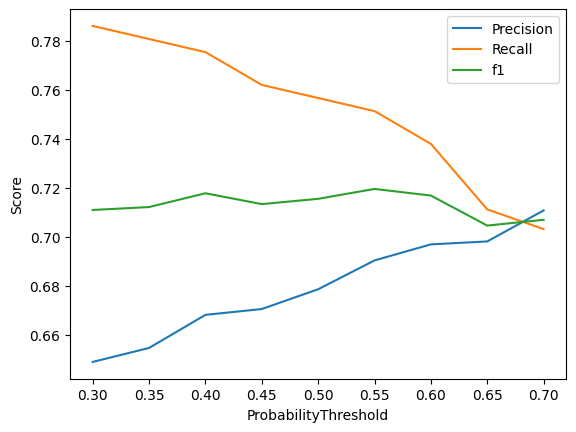

In [23]:
set_thrsd(validy, clf_pred)

In [24]:
# fpr, tpr, _= roc_curve(validy, clf_pred, pos_label=1)
# roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# prec, rec, _= precision_recall_curve(validy, clf_pred, pos_label=1)
# pr_display = PrecisionRecallDisplay(prec, rec)

print(F'ROC AUC Score: {roc_auc_score(validy, clf_pred)}')

# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# roc_display.plot(ax=ax1)
# pr_display.plot(ax=ax2)
# plt.show()

ROC AUC Score: 0.894419015680232


In [25]:
print(classification_report(validy, clf.predict(validx)))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       944
           1       0.62      0.83      0.71       374

    accuracy                           0.81      1318
   macro avg       0.77      0.82      0.79      1318
weighted avg       0.84      0.81      0.82      1318



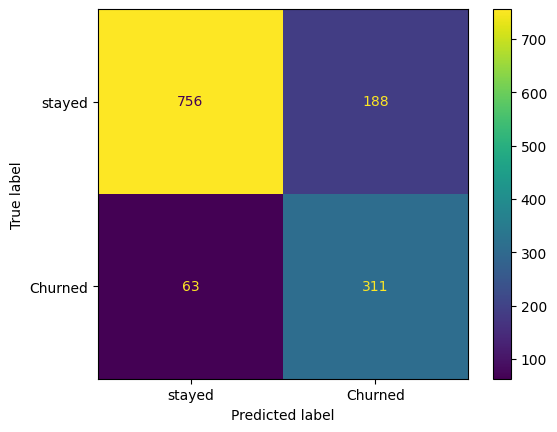

In [26]:
cm = confusion_matrix(validy, clf.predict(validx), labels=[0,1])
dist = ConfusionMatrixDisplay(cm, display_labels=['stayed', 'Churned'])
dist.plot()
plt.show()

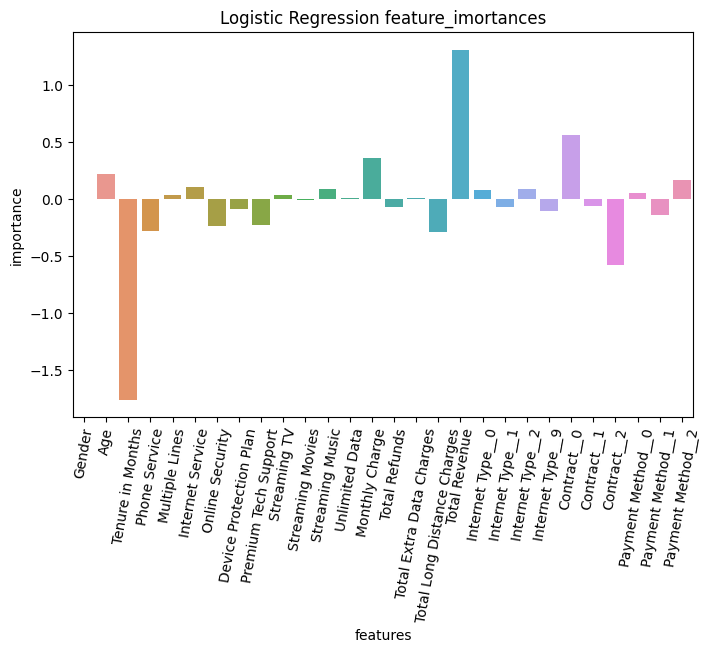

In [27]:
importances = pd.DataFrame({'importance':clf['logistic'].coef_[0], 'features':trainx.columns})
# importances.bar()
plt.figure(figsize=(8,5))
sns.barplot(data=importances, x='features', y='importance')
plt.xticks(rotation=80)
plt.title('Logistic Regression feature_imortances')
plt.show()

### DECISION TREE

In [28]:
dt = DecisionTreeClassifier(random_state=23, max_depth=5, criterion='gini', max_features=1.0, class_weight={0:0.3, 1:0.7})
dt.fit(trainx, trainy)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       max_features=1.0, random_state=23)

In [29]:
dt_pred = dt.predict(validx)
print(f'F1 score : {f1_score(validy, dt_pred)}')
print(f'ROC AUC Score : {roc_auc_score(validy, dt_pred)}')

F1 score : 0.7114716106604866
ROC AUC Score : 0.8140295024018851


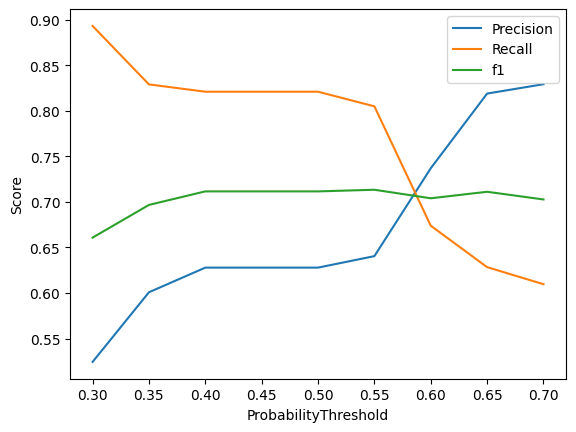

In [30]:
set_thrsd(validy, dt.predict_proba(validx)[:,1])
# lr.predict_proba(validx)[:,1]

In [31]:
print(classification_report(validy, dt.predict(validx), labels=[0,1], target_names=['stayed', 'churned']))

              precision    recall  f1-score   support

      stayed       0.92      0.81      0.86       944
     churned       0.63      0.82      0.71       374

    accuracy                           0.81      1318
   macro avg       0.77      0.81      0.79      1318
weighted avg       0.84      0.81      0.82      1318



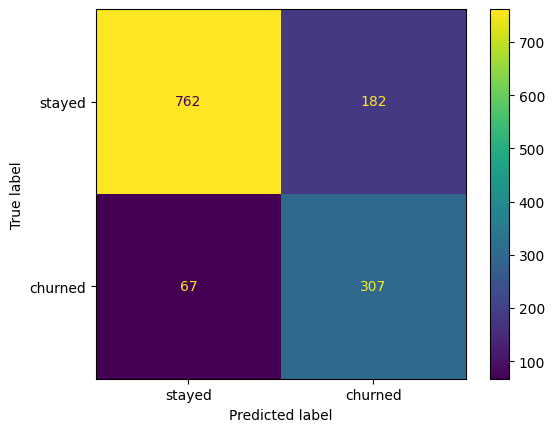

In [32]:
cm = confusion_matrix(validy, dt.predict(validx), labels=dt.classes_)
dist = ConfusionMatrixDisplay(cm, display_labels=['stayed', 'churned'])
dist.plot()
plt.show()

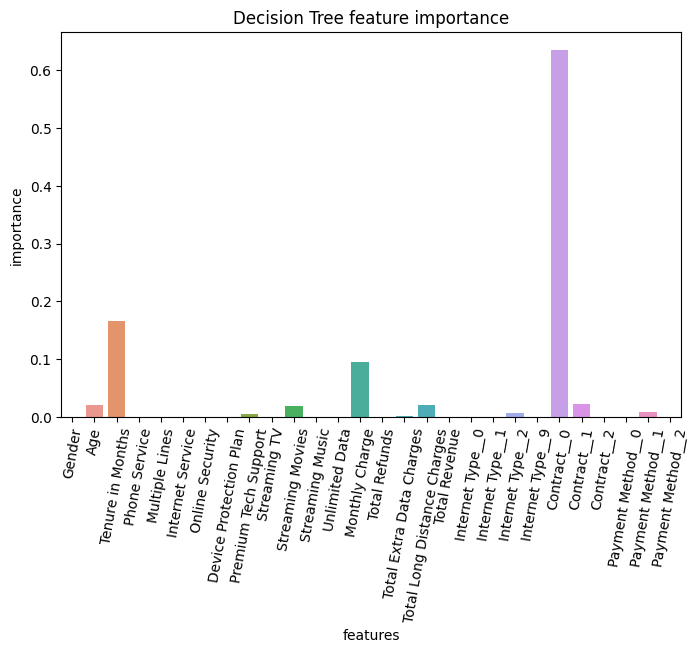

In [33]:
importances = pd.DataFrame({'importance':dt.feature_importances_, 'features':trainx.columns})
# importances.bar()
plt.figure(figsize=(8,5))
sns.barplot(data=importances, x='features', y='importance')
plt.xticks(rotation=80)
plt.title('Decision Tree feature importance')
plt.show()

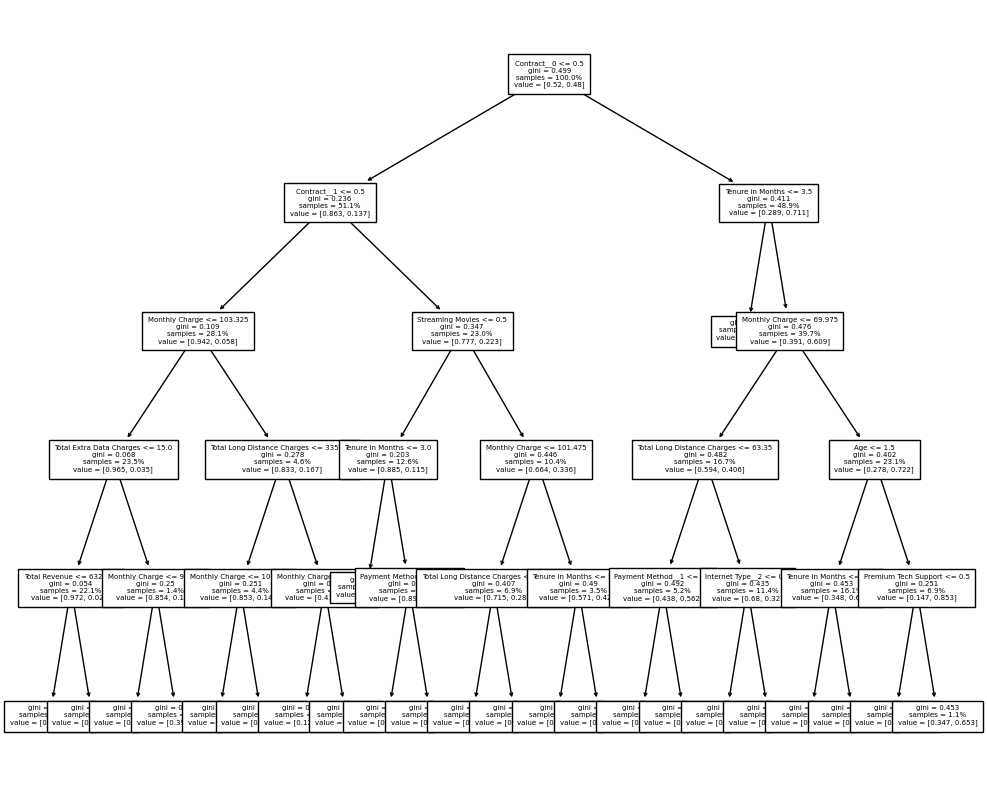

In [34]:
from sklearn import tree
plt.figure(figsize=(12, 10))
tree.plot_tree(dt, feature_names=trainx.columns, proportion=True, fontsize=5)
plt.show()

### Random Forest Classifier

In [42]:
rf = RandomForestClassifier(n_estimators=900, random_state=2022, warm_start=True, n_jobs=-1, criterion='gini', bootstrap=True, oob_score=True,
                           class_weight={0:0.3, 1:0.7}, max_depth=5, max_features=0.8, )
rf.fit(trainx, trainy)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       max_features=0.8, n_estimators=900, n_jobs=-1,
                       oob_score=True, random_state=2022, warm_start=True)

In [43]:
rf_pred = rf.predict(validx)
print(f'F1 score : {f1_score(validy, rf_pred)}')
print(f'ROC AUC Score : {roc_auc_score(validy, rf_pred)}')

F1 score : 0.708133971291866
ROC AUC Score : 0.8077981963201305


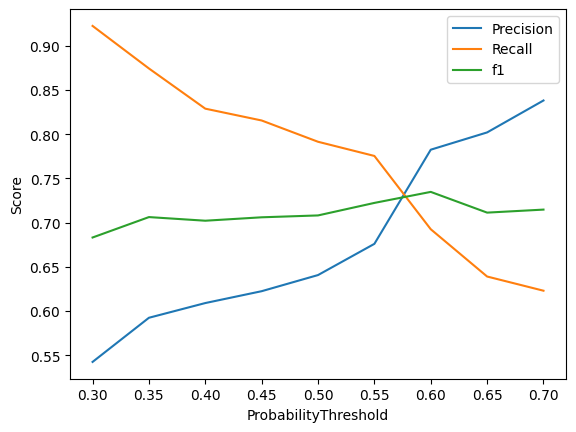

In [44]:
set_thrsd(validy, rf.predict_proba(validx)[:,1])

In [45]:
print(classification_report(validy, rf_pred, labels=[0,1], target_names=['stayed', 'Churned']))

              precision    recall  f1-score   support

      stayed       0.91      0.82      0.86       944
     Churned       0.64      0.79      0.71       374

    accuracy                           0.81      1318
   macro avg       0.77      0.81      0.79      1318
weighted avg       0.83      0.81      0.82      1318



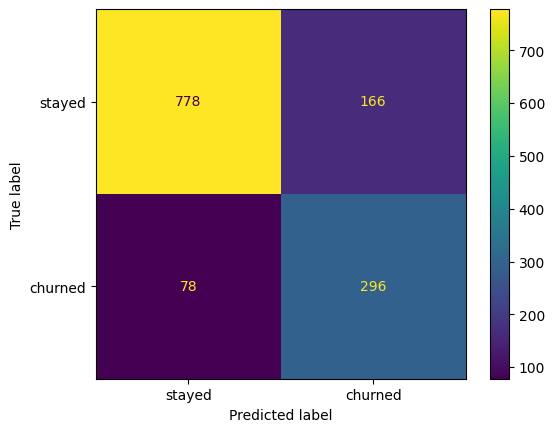

In [46]:
cm = confusion_matrix(validy, rf_pred, labels=rf.classes_)
dist = ConfusionMatrixDisplay(cm,  display_labels=['stayed', 'churned'])
dist.plot()
plt.show()

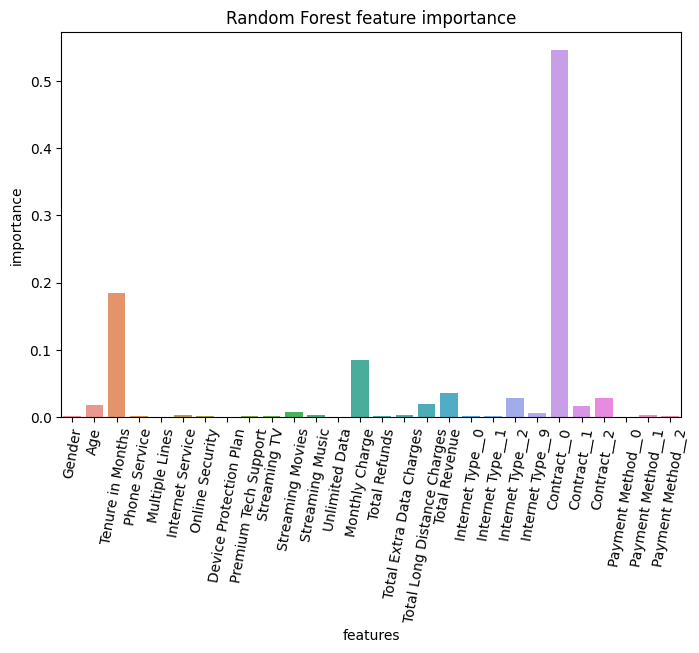

In [47]:
# show_importance(rf.feature_importances_)
importances = pd.DataFrame({'importance':rf.feature_importances_, 'features':trainx.columns})
# importances.bar()
plt.figure(figsize=(8,5))
sns.barplot(data=importances, x='features', y='importance')
plt.xticks(rotation=80)
plt.title('Random Forest feature importance')
plt.show()

## Conclusion:

In oder to predict if a customer will churn or not, the feature importances from the trained models shows the rank features that contribute to the classification.

The most features are:

* Monthly Contract
* Monthly Charge
* Tenure in months
* Total Revenue